<a href="https://colab.research.google.com/github/akheradmand/deep_learning_se3-CNN/blob/main/5animal_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dataset_path="/content/drive/MyDrive/datasets/5Animals"
idg=ImageDataGenerator(
    rescale= 1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

dataset_train=idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    # save_to_dir="/content/drive/MyDrive/datasets/animal_aug",
    subset="training",
    target_size=(224,224)
)

dataset_validation=idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1045 images belonging to 5 classes.
Found 258 images belonging to 5 classes.


In [14]:
model= models.Sequential([
    layers.Conv2D(64,(3,3),strides=(2,2),activation="relu", padding="same", input_shape=(224,224,3)),
    layers.Conv2D(64,(3,3),strides=(2,2),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(128,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.Conv2D(256,(3,3),strides=(1,1),activation="relu", padding="same"),
    layers.MaxPooling2D(),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.MaxPooling2D(),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.Conv2D(512,(3,3),strides=(1,1),activation="relu", padding="same"),
    # layers.MaxPooling2D(),

    layers.Flatten(),

    # layers.Dense(4096,activation="relu"),
    layers.Dense(1024,activation="relu"),
    layers.Dense(5,activation="softmax"),
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [16]:
output=model.fit(dataset_train,validation_data=dataset_validation, epochs=20)

Epoch 1/20
33/33 [==============================] - 158s 5s/step - loss: 1.5915 - accuracy: 0.2536 - val_loss: 1.5616 - val_accuracy: 0.2442
Epoch 2/20
33/33 [==============================] - 155s 5s/step - loss: 1.4800 - accuracy: 0.3321 - val_loss: 1.3303 - val_accuracy: 0.3992
Epoch 3/20
33/33 [==============================] - 150s 5s/step - loss: 1.3413 - accuracy: 0.3952 - val_loss: 1.3811 - val_accuracy: 0.3837
Epoch 4/20
33/33 [==============================] - 146s 4s/step - loss: 1.2664 - accuracy: 0.4651 - val_loss: 1.2354 - val_accuracy: 0.4186
Epoch 5/20
33/33 [==============================] - 158s 5s/step - loss: 1.2241 - accuracy: 0.4813 - val_loss: 1.2094 - val_accuracy: 0.4341
Epoch 6/20
33/33 [==============================] - 151s 5s/step - loss: 1.1845 - accuracy: 0.5139 - val_loss: 1.1417 - val_accuracy: 0.5310
Epoch 7/20
33/33 [==============================] - 158s 5s/step - loss: 1.1343 - accuracy: 0.5301 - val_loss: 1.1800 - val_accuracy: 0.4651
Epoch 8/20
33

In [17]:
model.save("weights/animal_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0, 0.5, 'accuracy')

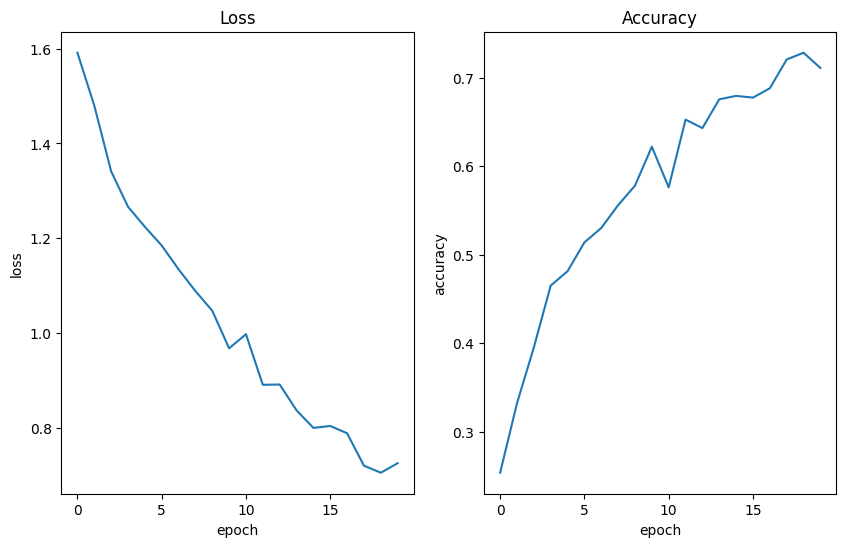

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.plot(output.history["loss"])
ax1.set_title("Loss")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax2.plot(output.history["accuracy"])
ax2.set_title("Accuracy")
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")

In [19]:
Y_pred=np.argmax(model.predict(dataset_validation),axis=1)
Y_pred


9/9 [==============================] - 14s 2s/step


array([3, 1, 4, 1, 4, 1, 1, 3, 0, 0, 4, 4, 2, 2, 3, 2, 1, 2, 4, 2, 4, 1,
       3, 2, 2, 1, 0, 1, 4, 4, 4, 0, 4, 1, 1, 4, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 0, 2, 4, 0, 0, 1, 2, 2, 1, 3, 3, 1, 3, 2, 3, 2,
       0, 2, 3, 0, 1, 0, 1, 4, 0, 2, 2, 0, 2, 0, 0, 3, 3, 0, 1, 0, 3, 3,
       0, 4, 2, 1, 0, 2, 0, 4, 1, 0, 1, 2, 0, 0, 1, 0, 4, 3, 3, 3, 4, 1,
       0, 3, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 4, 1, 0, 0, 4, 3, 4, 0, 3, 2,
       4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 1, 4, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 3, 4, 3, 1, 1, 1, 0, 4, 1, 3, 0, 0, 1, 1, 4, 1, 1, 1,
       1, 0, 1, 4, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 4, 4, 3, 4, 4, 2, 4, 3,
       3, 4, 0, 1, 4, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 4, 1, 2, 0, 1,
       4, 2, 4, 1, 4, 4, 3, 1, 2, 1, 4, 4, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1,
       2, 4, 1, 4, 2, 0, 2, 3, 1, 1, 1, 1, 2, 2, 0, 3])

In [20]:
Y_true=(dataset_validation.classes)

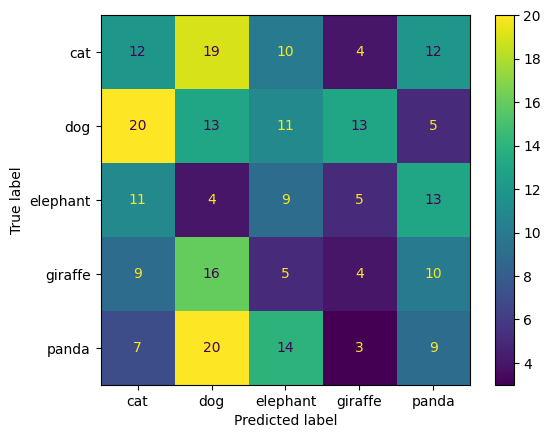

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_true,Y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["cat", "dog", "elephant", "giraffe", "panda"])

cm_display.plot()
plt.show()

In [22]:
import cv2

# image = cv2.imread("test1.jpg")
image = cv2.imread("/content/drive/MyDrive/datasets/5Animals/dog/(13).jpg")
image.shape
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224,224))
image = image / 255.0
image = image.reshape(1,224,224,3)

x = image

output = model.predict(x)
output_class=np.argmax(output)

if output_class==0:
  print("😺")
elif output_class==1:
  print("🐶")
elif output_class==2:
  print("🐘")
elif output_class==3:
  print("🦒")
elif output_class==4:
  print("🐼")

1/1 [==============================] - 0s 190ms/step
🐶
